# Aprendizaje no-supervisado: Reducción de la dimensionalidad y Clustering

El **aprendizaje no-supervisado** trata un tipo de problema diferente. En estos casos no tenemos un conocimiento a priori; es decir, no tenemos datos etiquetados. El objetivo del aprendizaje no-supervisado es encontrar similitudes entre los objetos que completan el conjunto de datos. Dentro del aprendizaje no-supervisado tenemos problemas como *reducción de la dimensionalidad, clustering, detección de anomalias* o *la estimación de la función de densidad de probabilidad probabilidad subyacente no observable*.

A veces, se pueden usar los métodos de aprendizaje no-supervisado en conjunto con los de aprendizaje supervisado. Por ejemplo, el aprendizaje no-supervisado se puede usar para encontrar carácteristicas útiles en el conjunto de datos y luego usar estas carácterísticas para hacer aprendizaje supervisado.

En el caso del dataset de lirios, vamos a ver que podemos usar métodos de aprendizaje no-supervisado para encontrar combinaciones de las mediciones que mejor describen los datos. Así, vamos a conseguir visualizar el dataset de cuatro dimensiones usando solamente 2 dimensiones.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Reducción de la dimensionalidad: PCA

El análisis de componentes principales (PCA) es una técnica de reducción de la dimensionalidad que es utilizada para describir un conjunto de datos en términos de nuevas variables (componentes) no correlacionadas que expliquen la mayor cantidad de varianza posible.


In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X, y = iris.data, iris.target

pca = PCA(n_components=0.95)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

Reduced dataset shape: (150, 2)


El significado de los nuevos componenetes>
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


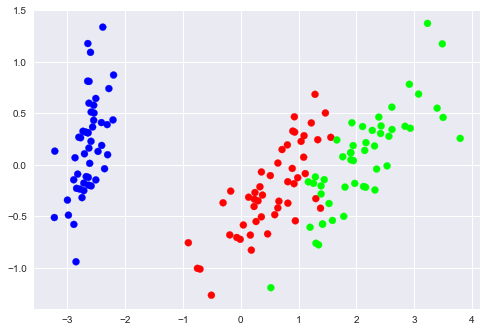

In [3]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='brg')

print("El significado de los nuevos componenetes>")
for component in pca.components_:
    print(" + ".join(f"{value:.3f} x {name}" for value, name in zip(component, iris.feature_names)))

## Clustering: K-means

Un algoritmo de aggrupamiento (clustering en inglés) es un procedimiento de agrupación de unas serie de vectores o instancias de acuerdo con un criterio. esos criterios son por lo general distancia o similitud.

Hay que tener en cuenta que los grupos descubrirán la estructura oculta relevante de los datos sólo si el criterio utilizado lo destaca. 

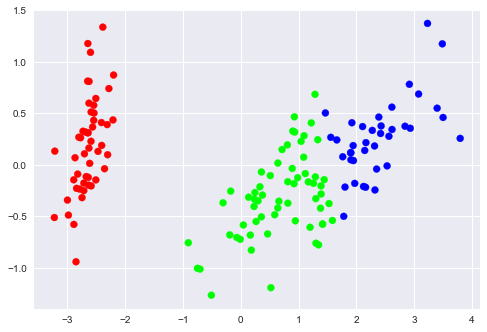

In [23]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=0)
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='brg');